In [1]:
import numpy as np
import matplotlib.pyplot as plt

Indicateurs:
- ta: Temps d'adoption de la fake news
- tf: Taux de personnes qui croient à la fin
- gp: Indicateur sur p (la conviction)

In [58]:
def essai():
    L=[]
    L1= np.random.uniform(low=0.0, high=1.0, size=10)
    for k in range (5):
        for i in L1:
            L.append(i)
        return L

print(essai())

[0.215556331916136, 0.7368917235906506, 0.26434619423511374, 0.7043130704741201, 0.658533526651456, 0.6569097076230722, 0.39461568490471954, 0.6280484011010943, 0.5602116240260661, 0.4141441293342326]


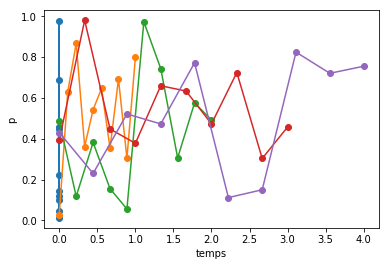

In [60]:
%matplotlib inline
N=5
t=0
for i in range (N):
    y=essai()
    x = np.linspace(0,t,10)
    plt.plot(x,y,marker='o')
    t=t+1
plt.ylabel('p')
plt.xlabel("temps")
plt.show()

In [53]:
import numpy as np
def ex():
    L=[0.5]
    L1= np.random.uniform(low=0.0, high=1.0, size=4)
    while len(L)<5:
        for i in L1:
            L.append(i)
        return L
    
print(ex())

[0.5, 0.1717035793910624, 0.894961647895233, 0.7814587416238418, 0.12414981615860066]


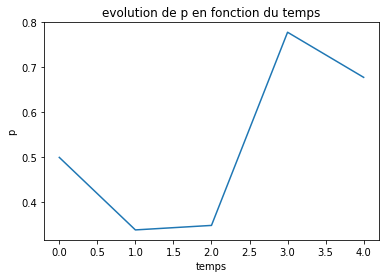

In [57]:
x=np.array([0,1,2,3,4])
y=ex()
plt.plot(x,y)
plt.xlabel('temps')
plt.ylabel('p')
plt.title('evolution de p en fonction du temps')
plt.show()